# **SVM (SUPPORT VECTOR MACHINE)**

# **SVM ( Destek Vektör Makineleri ) Nedir?**

SVM, sınıflandırma ve regresyon görevleri için kullanılan, denetimli bir makine öğrenimi algoritması olsa da genellikle sınıflandırma problemleri için daha uygundur. SVM'nin temel amacı, veri noktalarını sınıflara ayıran en iyi hiper düzlemi (hyperplane) bulmaktır. Ayrıca, sınıflar arasındaki destek vektörleri adı verilen en yakın noktalar arasındaki mesafeyi (margin) maksimize etmeye çalışır.

**Hiper Düzlem ve Boyutlar**

Hiper düzlemin şekli, veri kümesindeki özellik (feature) sayısına bağlıdır.

2 özellik: Hiper düzlemi bir doğruyu ifade eder.

3 özellik: Hiper düzlemi 2 boyutlu bir düzlem olur.

3’ten fazla özellik: Hiper düzlemi görselleştirmek zorlaşır.

# Doğrusal Olarak Ayrılabilen Veriler

İki özniteliğe sahip bir veri kümesinde, farklı sınıfları ayıran birden fazla doğru (hiper düzlem) olabilir.

**Soru:** Hangi doğru en iyisidir?

**Cevap:** Sınıflar arasındaki mesafeyi maksimize eden doğru, yani maksimum marj hiper düzlemi (hard margin) olan doğru en iyi seçimdir.

**Aykırı Değerler (Outliers) ve Yumuşak Marjlar (Soft Margins)**

Eğer veri kümesinde aykırı değerler varsa, SVM bu noktaları göz ardı ederek en uygun hiper düzlemi bulabilir.

Bu durumda, yumuşak marjlar kullanılır ve model, sınıflar arasındaki mesafeyi maksimize ederken ceza (penalty) uygular.

**Hinge Loss:** Marjı ihlal eden noktalar için kullanılan bir ceza fonksiyonudur.

# Doğrusal Olarak Ayrılamayan Veriler

Eğer veriler doğrusal olarak ayrılabilir değilse (yani bir düz çizgi ile ayrılamıyorsa):

SVM, kernel adı verilen bir dönüşüm fonksiyonu kullanarak verileri daha yüksek boyutlu bir uzaya dönüştürür. Bu dönüşüm, karmaşık desenlerin daha kolay ayrılmasını sağlar.

# Kernel Fonksiyonu
Kernel, veriyi daha yüksek boyutlu bir uzaya haritalar ve doğrusal olarak ayrılamayan veriler için etkili bir çözüm sunar.Mesela  1 boyutlu bir veri seti, bir kernel fonksiyonu ile 2 boyutlu bir uzaya haritalanabilir ve böylece sınıflar daha kolay ayrılabilir hale gelir.


**RBF Kernel:** Uzayda daha geniş ayrımlar yapabilen bir "radial" fonksiyondur. Çoğu durumda etkili bir seçim olduğundan varsayılan seçim olarak ayarlanmıştır.

**Polynomial Kernel:** Polinom derecesi (degree) artırıldıkça daha karmaşık karar sınırları oluşur. Bu kernel polinom ayrımlı veriler için uygundur.

**Linear Kernel:** Özellikle çok sayıda özellik ve az sayıda örnek içeren veri setlerinde daha hızlıdır. Doğrusal olarak ayrılabilir veriler için uygundur.

**Sigmoid Kernel:** Nadir kullanılır, çünkü genellikle diğer çekirdeklerden daha az performans gösterir. Sinir ağı aktivasyon fonksiyonlarına benzer.

**Gamma Parametresi:**

RBF veya polynomial kernel kullanıldığında önemli bir parametredir.

Küçük gamma, daha geniş bir etki alanı (daha düz bir sınır), büyük gamma ise daha dar bir etki alanı sağlar.

# SVM’nin Gücü ve Esnekliği

Doğrusal ve doğrusal olmayan veri kümelerini ayrıştırabilir.

Aykırı değerlere karşı dayanıklıdır ve esnek bir şekilde yumuşak marjlar uygulayabilir.

Kernel fonksiyonları sayesinde karmaşık sınıflandırma problemlerini çözebilir.

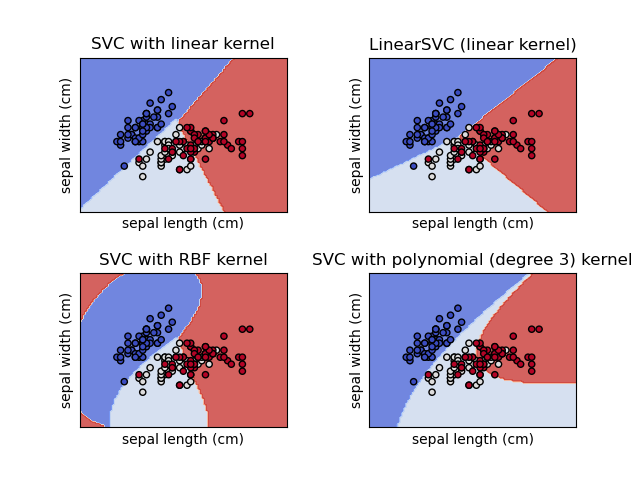

Görselin Kaynağı:https://scikit-learn.org/1.5/modules/svm.html

# **Öne Çıkan Kavramlar**
# Destek Vektörleri (Support Vectors)

Hiperdüzleme en yakın veri noktalarıdır. Bu noktalar, sınıflandırmayı etkileyen kritik örneklerdir.

# Marj (Margin)

Hiperdüzlem ile destek vektörleri arasındaki mesafedir. SVM, marjı maksimize etmeye çalışır (maksimum marj sınıflandırıcısı).


# C Parametresi

Modelin hatalara karşı toleransını kontrol eder.

**Büyük C değeri:** Daha az hata, dar marj.

**Küçük C değeri:** Daha fazla hata, geniş marj.

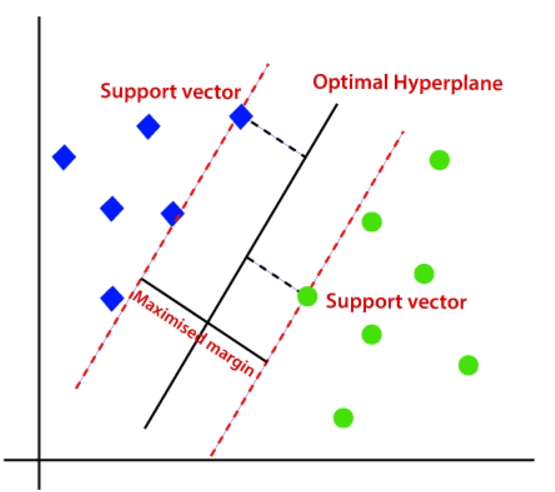

Görselin Kaynağı:https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.83      0.90        63
      benign       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



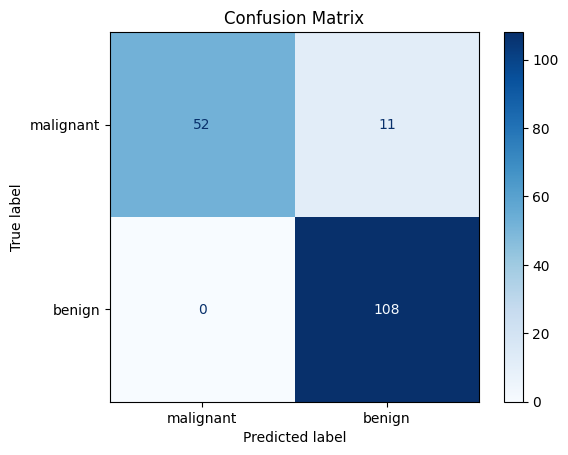

In [ ]:
# Gerekli kütüphaneler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Veri setini yükle
data = load_breast_cancer()
X, y = data.data, data.target

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM modelini oluştur ve eğit
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Tahminler
y_pred = svm_model.predict(X_test)

# Performans değerlendirme
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Sonuçları yorumlamak gerekirse Confusion Matriksin mavi renkli köşegenine bakarak doğru bilinen vaka sayılarını söylebiliriz diğer yandan köşegen dışında kalan sayılar ise yanlış tahmin ettiğimiz vaka sayını gösteriyor olacak. Burada 11 hastamızın sonucuna malign (kötü huylu) olmasına rağmen benign (iyi huylu) demiş olduk. Bu arada F1 Score tablosunda accuracy % 95 çıkmış ve model başarılı görünse de burada bir sağlık datası ile çalıştığımızdan recall değerine bakmamız uygun olacaktır. Recall değerimiz % 83 olarak çıktığından modelimize başarılı dememiz uygun olmayacaktır çünkü 11 hastamıza sağlıklısın deyip göndermiş olduk.

# SVM'nin Avantajları/Dezavantajları ve Kısıtlamaları
**Avantajlar**

Küçük veri setlerinde etkili: Özellikle az sayıda örneğe sahip veri setlerinde iyi sonuçlar verir.

Aykırı değerlere dayanıklılık: Yumuşak marjlar sayesinde aykırı değerlerin etkilerini azaltabilir.

Çeşitli kernel fonksiyonları: Doğrusal olmayan verileri de başarılı bir şekilde sınıflandırabilmek için farklı kernel seçenekleri sunar.

Genelleyebilirlik: İyi ayarlanmış bir SVM modeli, yeni verilere karşı iyi bir genelleme yeteneği gösterir.

**Dezavantajları**

Büyük veri setlerinde yavaşlık: Özellikle çok büyük veri setlerinde eğitim süresi uzun olabilir.

Hiperparametre ayarlama: Kernel seçimi, gamma parametresi gibi hiperparametrelerin uygun şekilde ayarlanması önemlidir ve bu işlem zaman alabilir.

Yüksek boyutlu verilerde zorluk: Çok yüksek boyutlu verilerde hesaplama maliyeti artabilir ve performans düşebilir.


**Kullanım Alanları**

Sınıflandırma: İki veya daha fazla sınıfa ait verileri ayırmak için kullanılır (örneğin, spam e-posta tespiti, görüntü tanıma).

Regresyon: Sürekli değerli hedef değişkenleri tahmin etmek için kullanılır (örneğin, ev fiyat tahmini).

Anormallik tespiti: Aykırı değerleri tespit etmek için kullanılabilir.

# Hiperparametre Ayarı ve Optimizasyonu

GridSearchCV veya RandomizedSearchCV kullanarak hiperparametre ayarı yaparak en iyi sonucu elde edebiliriz. GridSearch uzun süren bir yöntem olsa da en iyi parametreyi bulmak zorundaysanız kullanabileceğiniz bir yöntemdir yine de datanız eğer çok büyük ve karmaşıksa başka yollar denenebilir. Örneğin bu dataset ve SVM algoritması için GridSearch tam olarak 3 dakika 27 saniye çalıştı ve en iyi parametreler "Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}" olarak bulundu. Verbose ayarını değiştirerek çıktıların görünürlüğünü kapatabilirsiniz ben gözlemleyebilmeniz için açık bıraktım.

Bu şekilde başka neler kullanılabilir derseniz;

Küçük veri kümeleri ve az sayıda hiperparametre varsa: **Grid Search** veya **Random Search** yeterli olabilir.

Büyük veri kümeleri ve karmaşık modellerde: **Bayesian Optimization, Hyperband, Optuna** gibi yöntemler önerilir.

Daha yenilikçi ve optimizasyon stratejileri için: **Genetic Algorithms, SMAC,** veya **TPE** kullanabilirsiniz.

Bu yöntemleri de diğer algoritmaları anlatırken kullanıp anlatabilirim.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreler
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# GridSearch ile model optimizasyonu
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# En iyi parametreler
print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

# Model Performansının Görselleştirilmesi

SVM'nin karar sınırlarını aşağıdaki kod parçası ile görselleştirebiliriz. 2D veri setlerinde karar sınırlarını çizmek için aşağıdaki kodu kullanabiliriz.

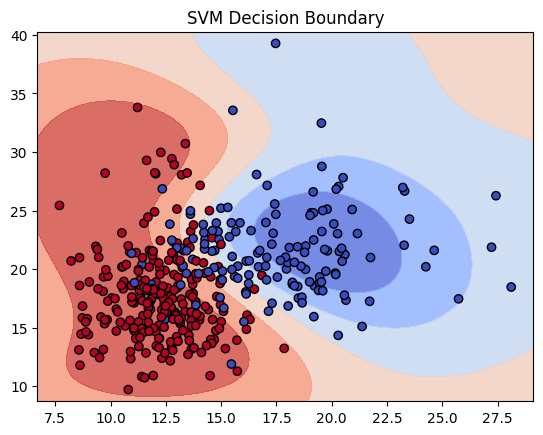

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Karar sınırını çiz
X_reduced = X_train[:, :2]  # 2D alt uzaya indir
svm_model.fit(X_reduced, y_train)

xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min()-1, X_reduced[:, 0].max()+1, 100),
                     np.linspace(X_reduced[:, 1].min()-1, X_reduced[:, 1].max()+1, 100))

Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap='coolwarm', alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("SVM Decision Boundary")
plt.show()
